# Trend Distribusi Jumlah Kursi di Jalan dengan Banyak Usaha di Los Angeles dengan Robot Pramusaji

## Pendahuluan

Dalam era inovasi yang terus berkembang, bisnis kafe tidak lagi terbatas pada pengalaman tradisional. Seiring teknologi memainkan peran yang semakin penting dalam kehidupan sehari-hari, munculnya gagasan untuk membuka sebuah kafe yang menggabungkan teknologi canggih menjadi sebuah realitas menarik. Kami, sebagai penggagas proyek ini, dengan penuh semangat memperkenalkan konsep kafe unik di Los Angeles yang tidak hanya menawarkan pengalaman kuliner yang luar biasa tetapi juga memanfaatkan kehadiran robot sebagai pramusaji.

Keunikan konsep ini memberikan tantangan sekaligus peluang besar. Meskipun terdapat potensi daya tarik yang signifikan pada awalnya, proyek ini juga memerlukan investasi yang substansial untuk merancang dan mengimplementasikan teknologi robotik yang canggih. Oleh karena itu, kami telah mengambil keputusan untuk mencari dukungan finansial dari para investor yang berminat terhadap inovasi di industri kuliner.

Dalam upaya memahami peluang dan tantangan yang mungkin dihadapi proyek ini, kami telah menginstruksikan seorang pakar analisis untuk menyusun riset pasar yang komprehensif. Riset ini akan memberikan pemahaman mendalam tentang kondisi pasar di Los Angeles, serta memberikan wawasan tentang bagaimana kita dapat mempertahankan daya tarik unik kafe ini dalam jangka panjang. Dengan adanya data open-source yang relevan, kami berharap dapat merumuskan strategi yang efektif untuk memastikan kesuksesan proyek ini di tengah perubahan dinamis dalam selera konsumen dan kemajuan teknologi.

## Tujuan 
Sebagai seorang Data Analyst, peran saya adalah memanfaatkan data open-source terkait jenis-jenis usaha tempat makan di Los Angeles. Analisis ini tidak hanya bertujuan untuk memahami kondisi pasar saat ini tetapi juga untuk merinci kebutuhan konsumen, mengidentifikasi tren yang mungkin memengaruhi keberlanjutan proyek, dan mengevaluasi bagaimana robotik dapat mempertahankan daya tariknya seiring berjalannya waktu.

## Tahapan

Berikut tahapan-tahapan project yang akan dilakukan:

1. Memuat data dan menyiapkannya untuk analisis
- Unduh data terkait berbagai jenis usaha tempat makan di LA. Pastikan bahwa tipe data untuk setiap kolomnya sudah benar dan tidak ada nilai yang hilang atau duplikat. Lakukan pra-pemrosesan data jika diperlukan. File path: `/datasets/rest_data_us.csv`.
2. Analisis data
- Teliti proporsi dari berbagai jenis usaha. Buat grafiknya.
- Teliti proporsi dari usaha berbasis waralaba dan nonwaralaba. Buat grafiknya.
- Jenis usaha mana yang biasanya merupakan usaha berbasis waralaba?
- Mana yang merupakan ciri-ciri dari jenis usaha berbasis waralaba: memiliki banyak tempat dengan jumlah kursi yang sedikit atau memiliki beberapa tempat dengan jumlah kursi yang banyak?
- Tentukan jumlah rata-rata kursi untuk setiap jenis usaha. Secara rata-rata, jenis usaha mana yang memiliki jumlah kursi terbanyak? Buat grafiknya.
- Pindahkan data nama jalan dari kolom `address` ke kolom terpisah.
- Buat grafik yang menampilkan sepuluh nama jalan teratas berdasarkan jumlah usaha (tempat makan).
- Temukan jumlah jalan yang hanya memiliki satu usaha (tempat makan).
- Untuk jalan yang dihuni oleh banyak usaha (tempat makan), perhatikan distribusi jumlah kursinya. Tren apa yang bisa kamu amati?

**Buat kesimpulan umumnya dan berikan rekomendasi tentang jenis usaha dan jumlah kursinya. Berikan komentar tentang peluang pengembangan usaha berbasis waralaba.** 

3. Mempersiapkan presentasi
- Siapkan presentasi penelitian untuk dibagikan kepada para investor. Kita bisa menggunakan tool apa saja untuk membuatnya, tetapi harus mengonversinya ke dalam format PDF agar presentasi lebih mudah untuk dinilai. Sertakan tautan menuju presentasi pada sel markdown dalam format beriku --> `Presentasi: <tautan ke penyimpanan cloud>` 


---------

## Inisialisasi
- Import library yang dibutuhkan.

In [1]:
# list library yang digunakan
from scipy import stats as st
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

------

## Memuat Data dan Menyiapkannya untuk Analisis
- Tahap ini bertujuan untuk memastikan bahwa tipe data untuk setiap kolomnya sudah benar dan tidak ada nilai yang hilang atau duplikat. Lakukan pra-pemrosesan data jika diperlukan.

### Memuat Data
- rest_data sebagai variable untuk memanggil dataset.

In [2]:
# Memuat data dan mendeklarasikan variable
rest_data = pd.read_csv('/datasets/rest_data_us.csv')

----

### Pra-pemrosesan Data
- Memastikan bahwa tipe data untuk setiap kolomnya sudah benar dan tidak ada nilai yang hilang atau duplikat.

In [3]:
# Memeriksa infrmasi dataset
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


<font color = green> Temuan </font>
- Terdapat sedikit nilai yang hilang pada kolom `chain`.

In [4]:
# Melihat nilai-nilai yang hilang pada kolom 'chain'
missing_values = rest_data['chain'].isnull()

# Menampilkan baris yang memiliki nilai hilang pada kolom 'chain'
missing_chain_data = rest_data[missing_values]

# Menampilkan hasil
missing_chain_data

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [5]:
# Memeriksa dataset
rest_data

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


<font color = green> Temuan </font>
- Berdasarkan dataset yang ditampilkan, kolom `chain` merupakan value boolean. Sebelumnya kita menemukan informasi bahwa kolom `chain` merupakan tipe data object atau string.

In [6]:
# Mengganti tipe data kolom 'chain' menjadi bool dan mengisinya dengan false
rest_data['chain'] = rest_data['chain'].fillna(False).astype(bool)

In [7]:
# Memeriksa kembail informasi dataset
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9651 non-null   bool  
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 386.5+ KB


<font color = green > Temuan </font>
- Tipe data sudah terlihat sesuai dan entries sudah terpenuhi tidak ada nilai yang kosong.

In [8]:
# Memeriksa kembali dataset yang tadi hilang
rest_data[rest_data['id'] == 19194]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,False,Restaurant,14


In [9]:
# Memeriksa kembali dataset secara utuh
rest_data

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


<font color = green> Kesimpulan Sementara </font>
- Hanya terdapat sedikit nilai yang hilang. Nilai hilang berada di kolom `chain` serta perubahan tipe data pada kolm `chain` menjadi boolean.

---------

## Analisis Data
- Analisis terdapat beberapa sub bab yang akan dikerjakan.

### Teliti Proporsi dari Berbagai Jenis Usaha 
- Membuat grafik dari proporsi berbagai jenis usaha

<font color = green> Kesimpulan Sementara </font>
- Ditemukan bahwa proporsi di kolom `object_type`, value Restaurant memiliki nilai yang paling tinggi.

---------

### Teliti Proporsi dari Usaha Berbasis Waralaba dan Nonwaralaba
- Membuat grafik proporsi dari usaha berbasis waralaba dan nonwaralaba

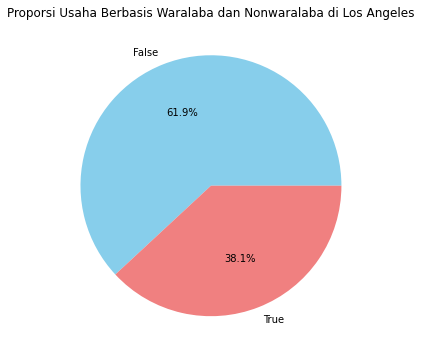

In [11]:
# Menghitung proporsi dari usaha berbasis waralaba dan nonwaralaba
proporsi_chain = rest_data['chain'].value_counts(normalize=True)

# Membuat grafik proporsi
plt.figure(figsize=(6, 6))
proporsi_chain.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Proporsi Usaha Berbasis Waralaba dan Nonwaralaba di Los Angeles')
plt.ylabel('')
plt.show()

<font color = green> Kesimpulan Sementara </font>
- Kolom `chain` merupakan benar atau tidaknya proporsi usaha berbasis warlaba dan non waralaba. Terindikasi bahwa 61.9% adalah Waralaba dan 38.1% merupakan Nonwaralaba.

-------

### Jenis Usaha Mana yang Biasanya Merupakan Usaha Berbasis Waralaba?
- Mencari jenis usaha yang berbasis waralaba

In [12]:
# Menghitung jumlah usaha berbasis waralaba untuk setiap jenis usaha
waralaba_by_type = rest_data.groupby('object_type')['chain'].sum()

# Menampilkan jenis usaha yang biasanya merupakan usaha berbasis waralaba
jenis_usaha_waralaba = waralaba_by_type[waralaba_by_type > 0].index.tolist()

print("Jenis usaha yang biasanya merupakan usaha berbasis waralaba:")
print(jenis_usaha_waralaba)


Jenis usaha yang biasanya merupakan usaha berbasis waralaba:
['Bakery', 'Bar', 'Cafe', 'Fast Food', 'Pizza', 'Restaurant']


<font color = green> Kesimpulan Sementara </font>
- Dari hasil agregasi kolom `object_type` terhadap `chain`, value Restaurant memiliki jumlah usaha yang berbasis waralaba tertinggi.

--------

### Mana yang Merupakan Ciri-Ciri dari Jenis Usaha Berbasis Waralaba?
- Manakah yang memiliki banyak tempat dengan jumlah kursi yang sedikit atau memiliki beberapa tempat dengan jumlah kursi yang banyak?


In [14]:
# Menghitung jumlah tempat dan jumlah kursi untuk setiap jenis usaha
jumlah_tempat_kursi_per_jenis_usaha = rest_data.groupby('object_type').agg({'number': 'sum', 'id': 'count'}).reset_index()
jumlah_tempat_kursi_per_jenis_usaha.columns = ['object_type', 'total_places', 'total_seats']

# Menampilkan hasil
jumlah_tempat_kursi_per_jenis_usaha

,object_type,total_places,total_seats
0,Bakery,6162,283
1,Bar,13072,292
2,Cafe,10875,435
3,Fast Food,33939,1066
4,Pizza,9107,320
5,Restaurant,348547,7255


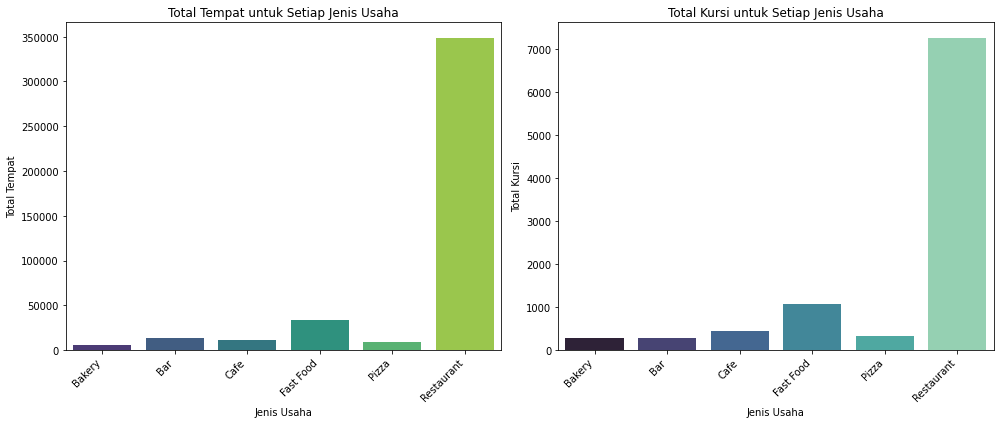

In [22]:
# Membuat grafik batang
plt.figure(figsize=(14, 6))

# Grafik jumlah tempat
plt.subplot(1, 2, 1)
sns.barplot(x='object_type', y='total_places', data=jumlah_tempat_kursi_per_jenis_usaha, palette='viridis')
plt.title('Total Tempat untuk Setiap Jenis Usaha')
plt.xlabel('Jenis Usaha')
plt.ylabel('Total Tempat')
plt.xticks(rotation=45, ha='right')

# Grafik jumlah kursi
plt.subplot(1, 2, 2)
sns.barplot(x='object_type', y='total_seats', data=jumlah_tempat_kursi_per_jenis_usaha, palette='mako')
plt.title('Total Kursi untuk Setiap Jenis Usaha')
plt.xlabel('Jenis Usaha')
plt.ylabel('Total Kursi')
plt.xticks(rotation=45, ha='right')

# Mengatur layout
plt.tight_layout()


<font color = green > Kesimpulan Sementara </font>
- Total tempat tertinggi yaitu Restaurant, sementara terendah yaitu Bakery. Untuk total kursi tertinggi yaitu Restaurant, sementara terendah yaitu Bar.

------------

### Tentukan Jumlah Rata-Rata Kursi untuk Setiap Jenis Usaha 
- Membuat Grafik Secara rata-rata, jenis usaha mana yang memiliki jumlah kursi terbanyak?

In [15]:
# Menghitung rata-rata jumlah tempat dan kursi untuk setiap jenis usaha
rata_rata_per_jenis_usaha = rest_data.groupby('object_type')[['number']].mean().reset_index()

# Menampilkan hasil
rata_rata_per_jenis_usaha

,object_type,number
0,Bakery,21.773852
1,Bar,44.767123
2,Cafe,25.000000
3,Fast Food,31.837711
4,Pizza,28.459375
5,Restaurant,48.042316


- Untuk mengevaluasi ciri-ciri dari jenis usaha berbasis waralaba, kita dapat menghitung rata-rata jumlah tempat dan rata-rata jumlah kursi untuk setiap jenis usaha. Jika rata-rata jumlah tempat tinggi dan rata-rata jumlah kursi rendah, itu mungkin menunjukkan bahwa jenis usaha tersebut cenderung memiliki banyak tempat dengan jumlah kursi yang sedikit.

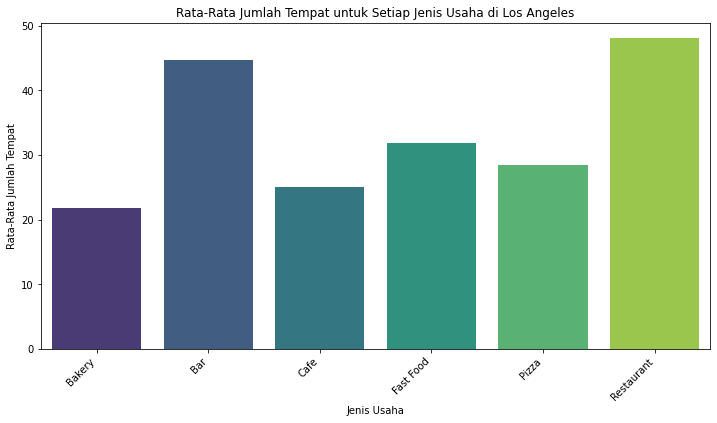

In [16]:
# Membuat grafik batang rata-rata jumlah tempat untuk setiap jenis usaha
plt.figure(figsize=(12, 6))
sns.barplot(x='object_type', y='number', data=rata_rata_per_jenis_usaha, palette='viridis')
plt.title('Rata-Rata Jumlah Tempat untuk Setiap Jenis Usaha di Los Angeles')
plt.xlabel('Jenis Usaha')
plt.ylabel('Rata-Rata Jumlah Tempat')
plt.xticks(rotation=45, ha='right')
plt.show()

<font color = green> Kesimpulan Sementara </font>
- Bisa dipastikan bahwa Bar yang memiliki rata-rata tinggi merupakan jumlah kursi yang dimiliki sangat sedikit untuk setiap tempat. Restaurant memiliki jumlah yang banyak dan selalu berbanding lurus dengan total tempat dan total kursi. 

-----

### Pindahkan Data Nama Jalan dari Kolom `address` ke Kolom Terpisah
- Mari kita pindahkan kolom address ke kolom terpisah untuk kepentingan analisis lebih lanjut

In [17]:
# Memisahkan data nama jalan dari kolom address
rest_data['street_name'] = rest_data['address'].apply(lambda x: x.split(',')[0].strip())

# Menampilkan hasil
rest_data[['address', 'street_name']]

,address,street_name
0,3708 N EAGLE ROCK BLVD,3708 N EAGLE ROCK BLVD
1,100 WORLD WAY # 120,100 WORLD WAY # 120
2,6801 HOLLYWOOD BLVD # 253,6801 HOLLYWOOD BLVD # 253
3,1814 W SUNSET BLVD,1814 W SUNSET BLVD
4,2100 ECHO PARK AVE,2100 ECHO PARK AVE
...,...,...
9646,217 W TEMPLE AVE,217 W TEMPLE AVE
9647,5750 MELROSE AVE,5750 MELROSE AVE
9648,6741 HOLLYWOOD BLVD,6741 HOLLYWOOD BLVD
9649,548 S SPRING ST STE 100,548 S SPRING ST STE 100


<font color = green> Kesimpulan Sementara </font>
- kolom `address` dilakukan pemisahan alamat untuk memudahkan kolom baru dengan nama yang sesuai menjadi `street_name`.

-----

### Buat Grafik yang Menampilkan Sepuluh Nama Jalan Teratas Berdasarkan Jumlah Usaha
- Menampilkan sepuluh nama jalan teratas berdasarkan jumlah usaha (tempat makan).

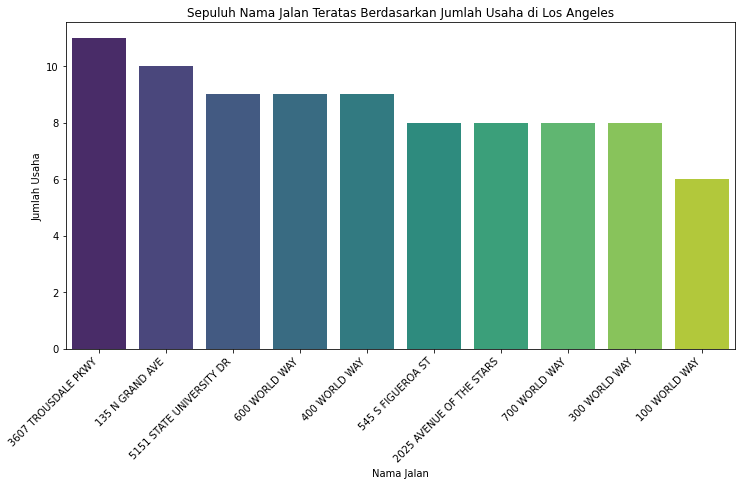

In [18]:
# Menghitung jumlah usaha untuk setiap nama jalan
top_street_names = rest_data['street_name'].value_counts().nlargest(10)

# Membuat grafik bar untuk sepuluh nama jalan teratas
plt.figure(figsize=(12, 6))
sns.barplot(x=top_street_names.index, y=top_street_names.values, palette='viridis')
plt.title('Sepuluh Nama Jalan Teratas Berdasarkan Jumlah Usaha di Los Angeles')
plt.xlabel('Nama Jalan')
plt.ylabel('Jumlah Usaha')
plt.xticks(rotation=45, ha='right')
plt.show()

<font color = green> Kesimpulan Sementara </font>
- Dengan nama kolom `street_name` diambil dari 10 nama jalan teratas berdasarkan jumlah usaha Los Angeles. 3607 TROUSDALE PKW merupakan yang tertinggi sedangkan 100 WORLD WAY merupaka yang terendah.

-------

### Temukan Jumlah Jalan yang Hanya Memiliki Satu Usaha
- Menentukan jumlah jalan yang hanya memiliki satu Usaha (tempat makan).

In [19]:
# Menghitung jumlah usaha untuk setiap nama jalan
count_per_street = rest_data['street_name'].value_counts()

# Menghitung jumlah jalan yang hanya memiliki satu usaha
jalan_satu_usaha = (count_per_street == 1).sum()

# Menampilkan hasil
print("Jumlah jalan yang hanya memiliki satu usaha:", jalan_satu_usaha)


Jumlah jalan yang hanya memiliki satu usaha: 7604


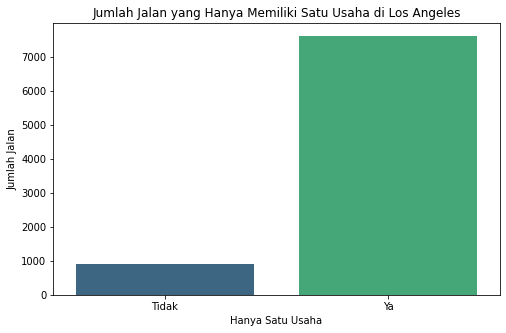

In [20]:
# Menghitung jumlah usaha untuk setiap nama jalan
count_per_street = rest_data['street_name'].value_counts()

# Menghitung jumlah jalan yang hanya memiliki satu usaha
jalan_satu_usaha = (count_per_street == 1).sum()

# Membuat grafik batang
plt.figure(figsize=(8, 5))
sns.countplot(x=(count_per_street == 1), palette='viridis')
plt.title('Jumlah Jalan yang Hanya Memiliki Satu Usaha di Los Angeles')
plt.xlabel('Hanya Satu Usaha')
plt.ylabel('Jumlah Jalan')
plt.xticks([0, 1], ['Tidak', 'Ya'])
plt.show()

<font color = green> Kesimpulan Sementara </font>
- Bisa dipastikan bahwa lebih dari 7000 jumlah jalan mendaftar usaha mereka berdasarkan hanya 1 alamat. Registrasi alamat secara plural berada di bawah 1000.

-------

### Jalan yang Dihuni oleh Banyak Usaha
- Untuk jalan yang dihuni oleh banyak usaha (tempat makan), perhatikan distribusi jumlah kursinya. Tren apa yang bisa kita amati?

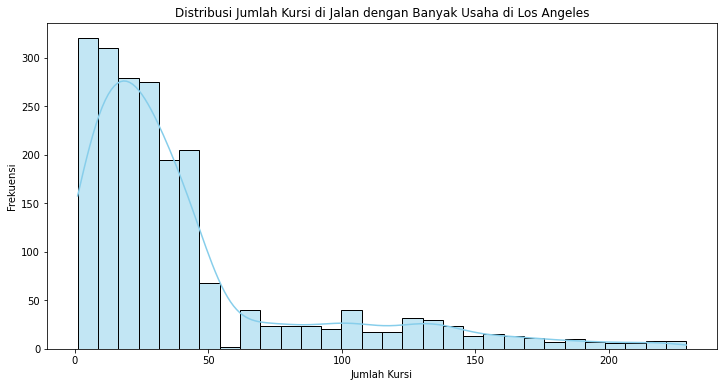

In [21]:
# Mengambil data jalan-jalan dengan lebih dari satu usaha
jalan_banyak_usaha = count_per_street[count_per_street > 1].index

# Memfilter data berdasarkan jalan-jalan dengan lebih dari satu usaha
data_jalan_banyak_usaha = rest_data[rest_data['street_name'].isin(jalan_banyak_usaha)]

# Membuat histogram distribusi jumlah kursi
plt.figure(figsize=(12, 6))
sns.histplot(data=data_jalan_banyak_usaha, x='number', bins=30, kde=True, color='skyblue')
plt.title('Distribusi Jumlah Kursi di Jalan dengan Banyak Usaha di Los Angeles')
plt.xlabel('Jumlah Kursi')
plt.ylabel('Frekuensi')
plt.show()

<font color = green> Kesimpulan Sementara </font>
- Distribusi frekuensi jumlah kuri di jalan dengan banyak usaha di Los Angeles cenderung miring ke kanan. Bisa dipastikan bahwa  Meskipun mayoritas tempat makan memiliki kapasitas yang sedang, ada beberapa tempat makan di jalan-jalan tersebut yang memiliki kapasitas tempat duduk yang lebih besar. Ini dapat diindikasikan oleh ekor distribusi yang panjang ke arah nilai yang lebih tinggi.

--------

## **Kesimpulan Umum**

- Hanya terdapat sedikit nilai yang hilang. Nilai hilang berada di kolom `chain` serta perubahan tipe data pada kolm chain menjadi boolean.
- Ditemukan bahwa proporsi di kolom `object_type`, value Restaurant memiliki nilai yang paling tinggi.
- Kolom `chain` merupakan benar atau tidaknya proporsi usaha berbasis warlaba dan non waralaba. Terindikasi bahwa 61.9% adalah Waralaba dan 38.1% merupakan Nonwaralaba.
- Dari hasil agregasi kolom `object_type` terhadap chain, value Restaurant memiliki jumlah usaha yang berbasis waralaba tertinggi.
- Total tempat tertinggi yaitu Restaurant, sementara terendah yaitu Bakery. Untuk total kursi tertinggi yaitu Restaurant, sementara terendah yaitu Bar.
- Bisa dipastikan bahwa Bar yang memiliki rata-rata tinggi merupakan jumlah kursi yang dimiliki sangat sedikit untuk setiap tempat. Restaurant memiliki jumlah yang banyak dan selalu berbanding lurus dengan total tempat dan total kursi.
- Bisa dipastikan bahwa Bar yang memiliki rata-rata tinggi merupakan jumlah kursi yang dimiliki sangat sedikit untuk setiap tempat. Restaurant memiliki jumlah yang banyak dan selalu berbanding lurus dengan total tempat dan total kursi.
- Kolom `address` dilakukan pemisahan alamat untuk memudahkan kolom baru dengan nama yang sesuai menjadi street_name.
- Dengan nama kolom `street_name` diambil dari 10 nama jalan teratas berdasarkan jumlah usaha Los Angeles. 3607 TROUSDALE PKW merupakan yang tertinggi sedangkan 100 WORLD WAY merupaka yang terendah.
- Bisa dipastikan bahwa lebih dari 7000 jumlah jalan mendaftar usaha mereka berdasarkan hanya 1 alamat. Registrasi alamat secara plural berada di bawah 1000.
- Distribusi frekuensi jumlah kuri di jalan dengan banyak usaha di Los Angeles cenderung miring ke kanan. Bisa dipastikan bahwa Meskipun mayoritas tempat makan memiliki kapasitas yang sedang, ada beberapa tempat makan di jalan-jalan tersebut yang memiliki kapasitas tempat duduk yang lebih besar. Ini dapat diindikasikan oleh ekor distribusi yang panjang ke arah nilai yang lebih tinggi.

**Ringkasan Kesimpulan**
- Los Angeles memiliki dominasi usaha jenis 'Restaurant' dan mayoritas usaha teridentifikasi sebagai waralaba.
- Jumlah tempat dan kursi terbesar terdapat pada jenis usaha 'Restaurant', sementara 'Bar' menonjol dengan rata-rata jumlah kursi tinggi.
- Adanya jalan-jalan dengan banyak usaha menunjukkan variasi kapasitas tempat duduk yang dapat dijadikan peluang investasi. Perlu memperhatikan tempat-tempat makan dengan kapasitas yang lebih besar.
- Data alamat dapat dimanfaatkan lebih lanjut untuk analisis lokasi dan strategi bisnis yang lebih efektif.

**Insights**
- Melanjutkan pemantauan dan analisis terhadap jenis usaha **'Bar'** yang memiliki rata-rata jumlah kursi tinggi namun jumlah tempat yang lebih sedikit.
- Menjajaki potensi kerjasama dengan usaha berbasis waralaba, terutama dalam jenis usaha **'Restaurant'** yang mendominasi pasar.
- Menggali lebih dalam pada jalan-jalan dengan banyak usaha yang memiliki kapasitas tempat duduk besar untuk menentukan potensi pertumbuhan atau investasi.
- Mengoptimalkan penggunaan data alamat dan mengeksplorasi lebih lanjut pola atau tren yang mungkin muncul dalam clustering bisnis di lokasi tertentu.

## Presentasi

Presentasi: <https://drive.google.com/file/d/1KHKqFjQQa1jZbHC-vKm4WPJGWZGwasxp/view?usp=sharing> 

--------